# 💼 Employee Salary Prediction using Machine Learning

This project predicts whether an employee earns more than 50K annually based on demographic and work-related features.  
The model uses **Logistic Regression**, trained on preprocessed data, and includes **feature scaling**, **encoding**, and **evaluation**.

---
🔧 Technologies Used: Python, Pandas, Scikit-learn, Matplotlib, Seaborn  
📊 ML Algorithm: Logistic Regression (Classification)  
📁 Dataset: Provided during internship (adult 3.csv)

---


In [8]:
from google.colab import files
uploaded = files.upload()



Saving adult 3.csv to adult 3 (1).csv


**Importing Libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**Loading & Clean Data**

In [41]:
df = pd.read_csv("adult 3.csv")

# Remove leading/trailing spaces from all text data
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Drop rows with missing values (like '?')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Optional: Drop non-useful column
df.drop(['fnlwgt'], axis=1, inplace=True)

df.head()


/tmp/ipython-input-41-1409795673.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


**Encoding Categorical** **Columns**

In [42]:
le_dict = {}
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


 **Spliting Data & Scaling**




In [43]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Training** **the Model**

In [44]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

 **Evaluating the Model**

In [45]:
y_pred = model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.8224433388612493

📊 Confusion Matrix:
 [[6452  390]
 [1216  987]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6842
           1       0.72      0.45      0.55      2203

    accuracy                           0.82      9045
   macro avg       0.78      0.70      0.72      9045
weighted avg       0.81      0.82      0.81      9045



 **Prediction for New Inputs**



In [55]:
sample = pd.DataFrame([{
    'age': 35,
    'workclass': le_dict['workclass'].transform(['Private'])[0],
    'education': le_dict['education'].transform(['Bachelors'])[0],
    'educational-num': 13,
    'marital-status': le_dict['marital-status'].transform(['Married-civ-spouse'])[0],
    'occupation': le_dict['occupation'].transform(['Exec-managerial'])[0],
    'relationship': le_dict['relationship'].transform(['Husband'])[0],
    'race': le_dict['race'].transform(['White'])[0],
    'gender': le_dict['gender'].transform(['Male'])[0],
    'capital-gain': 0,
    'capital-loss': 0,
    'hours-per-week': 45,
    'native-country': le_dict['native-country'].transform(['United-States'])[0]
}])

sample_scaled = scaler.transform(sample)
predicted = model.predict(sample_scaled)[0]
print("Predicted Income Group:", ">50K" if predicted else "<=50K")


Predicted Income Group: <=50K


**Data Visualization**

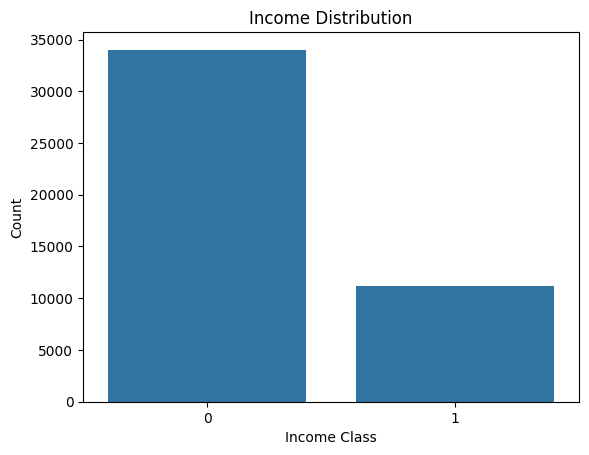

In [56]:
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()
